## K-means clustering on Iris dataset:

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

* **Id**
* **SepalLengthCm**
* **SepalWidthCm**
* **PetalLengthCm**
* **PetalWidthCm**
* **Species**

We'll build a k-means clustering model to classify different species of iris flower as below:

In [8]:
# Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sqlalchemy import create_engine

In [2]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [3]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [4]:
# Defining the k-means
cluster_numbers = [2, 3, 4, 5, 6]
kmeans_clusters = []

for i in cluster_numbers:
    k_means = KMeans(n_clusters=i, random_state=123)
    kmeans_clusters.append(k_means.fit_predict(X_std))

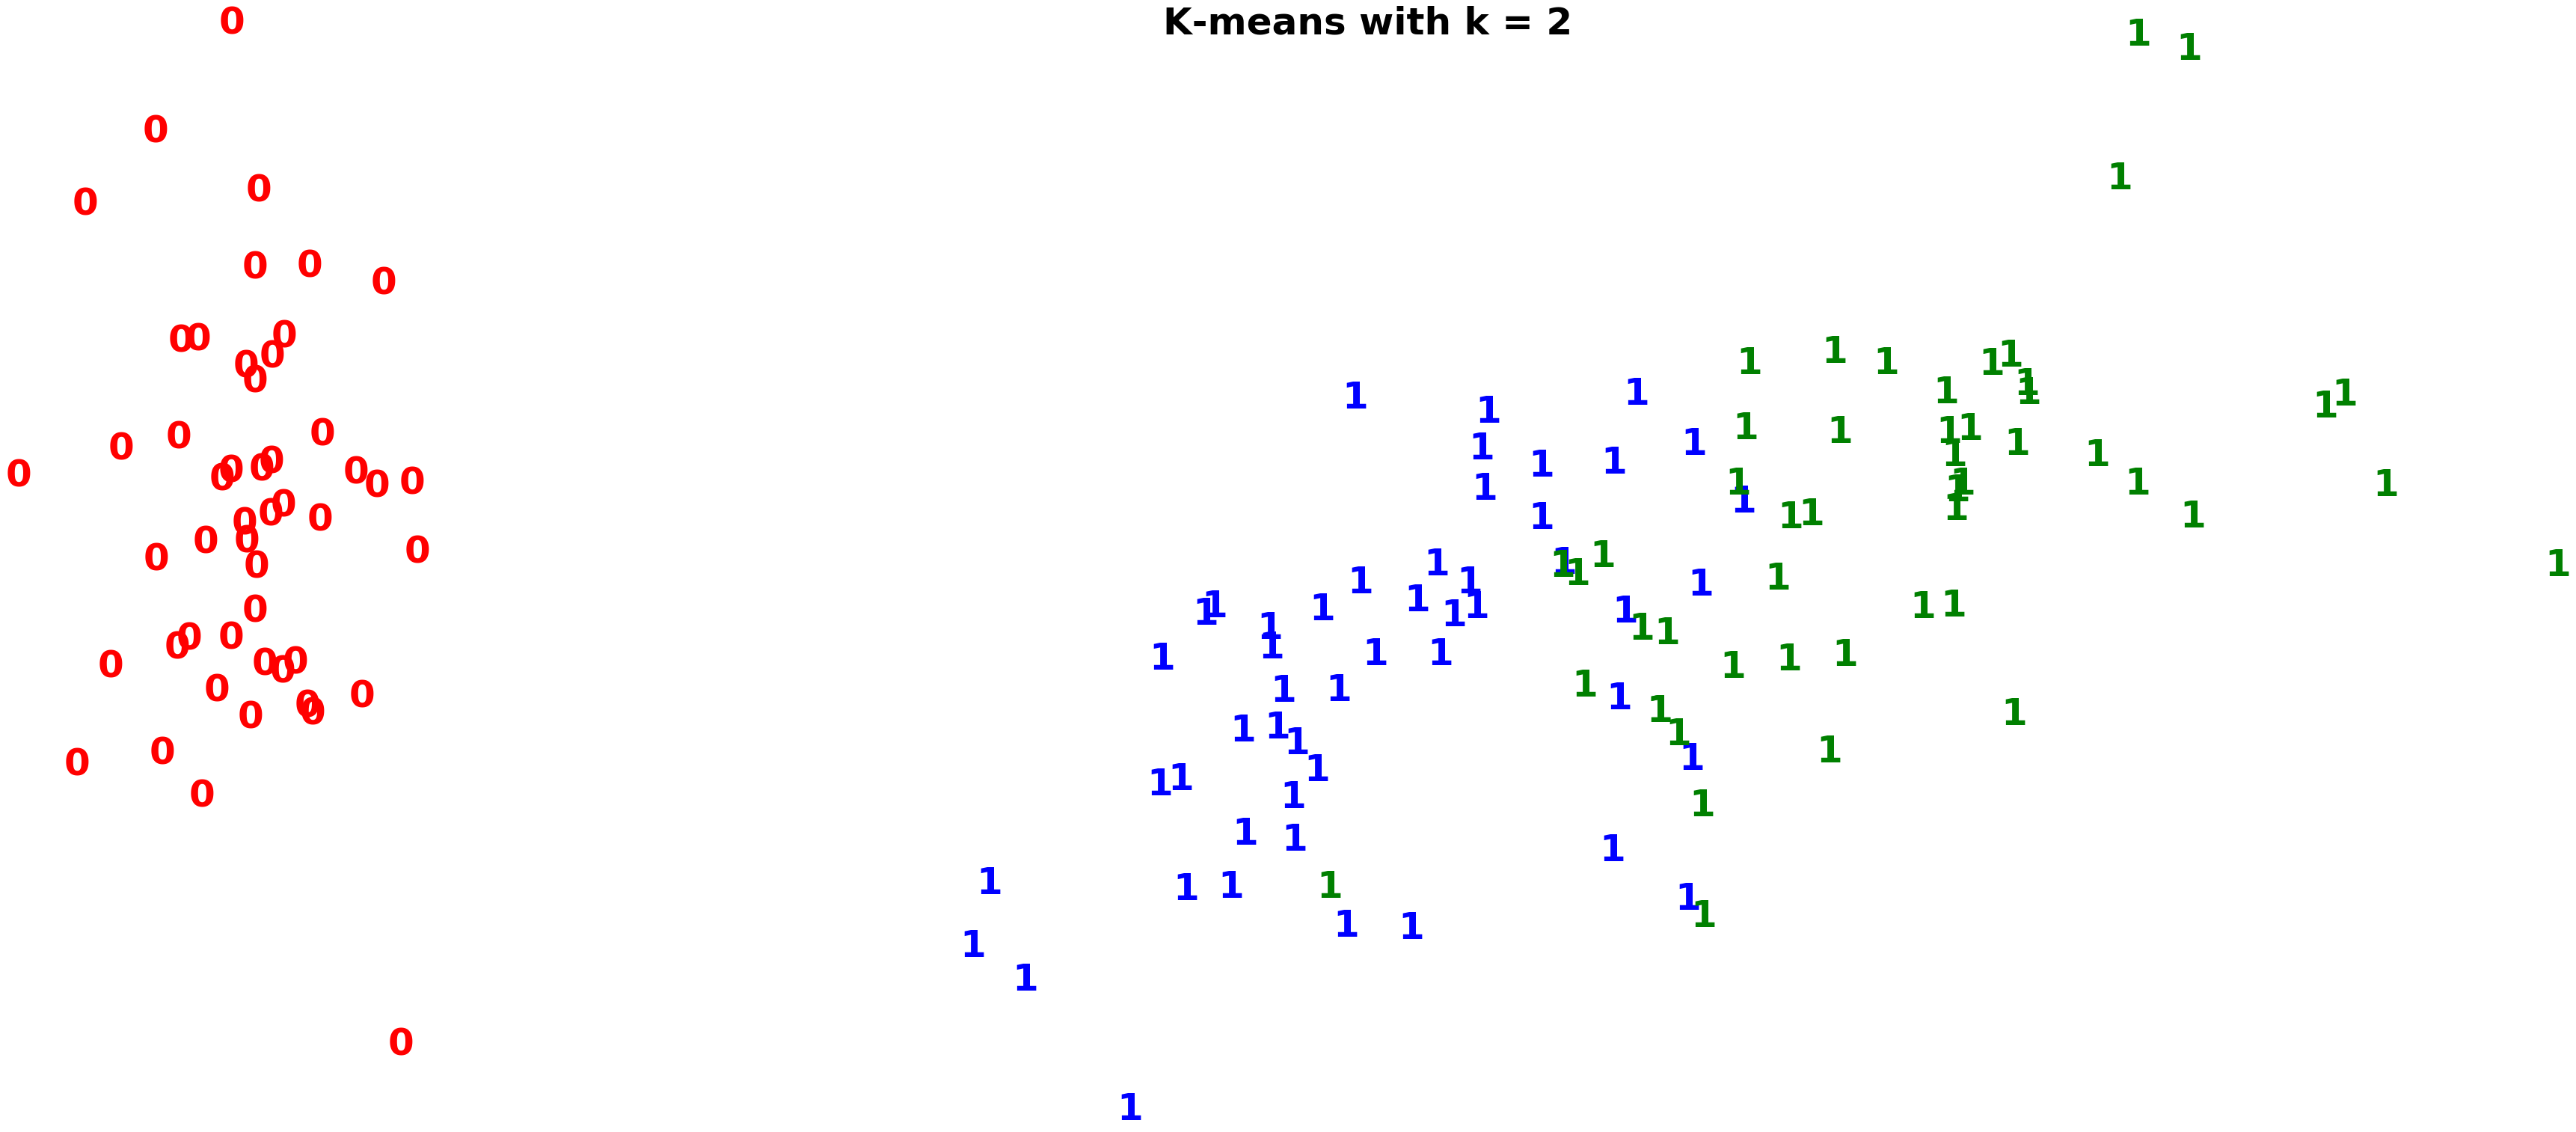

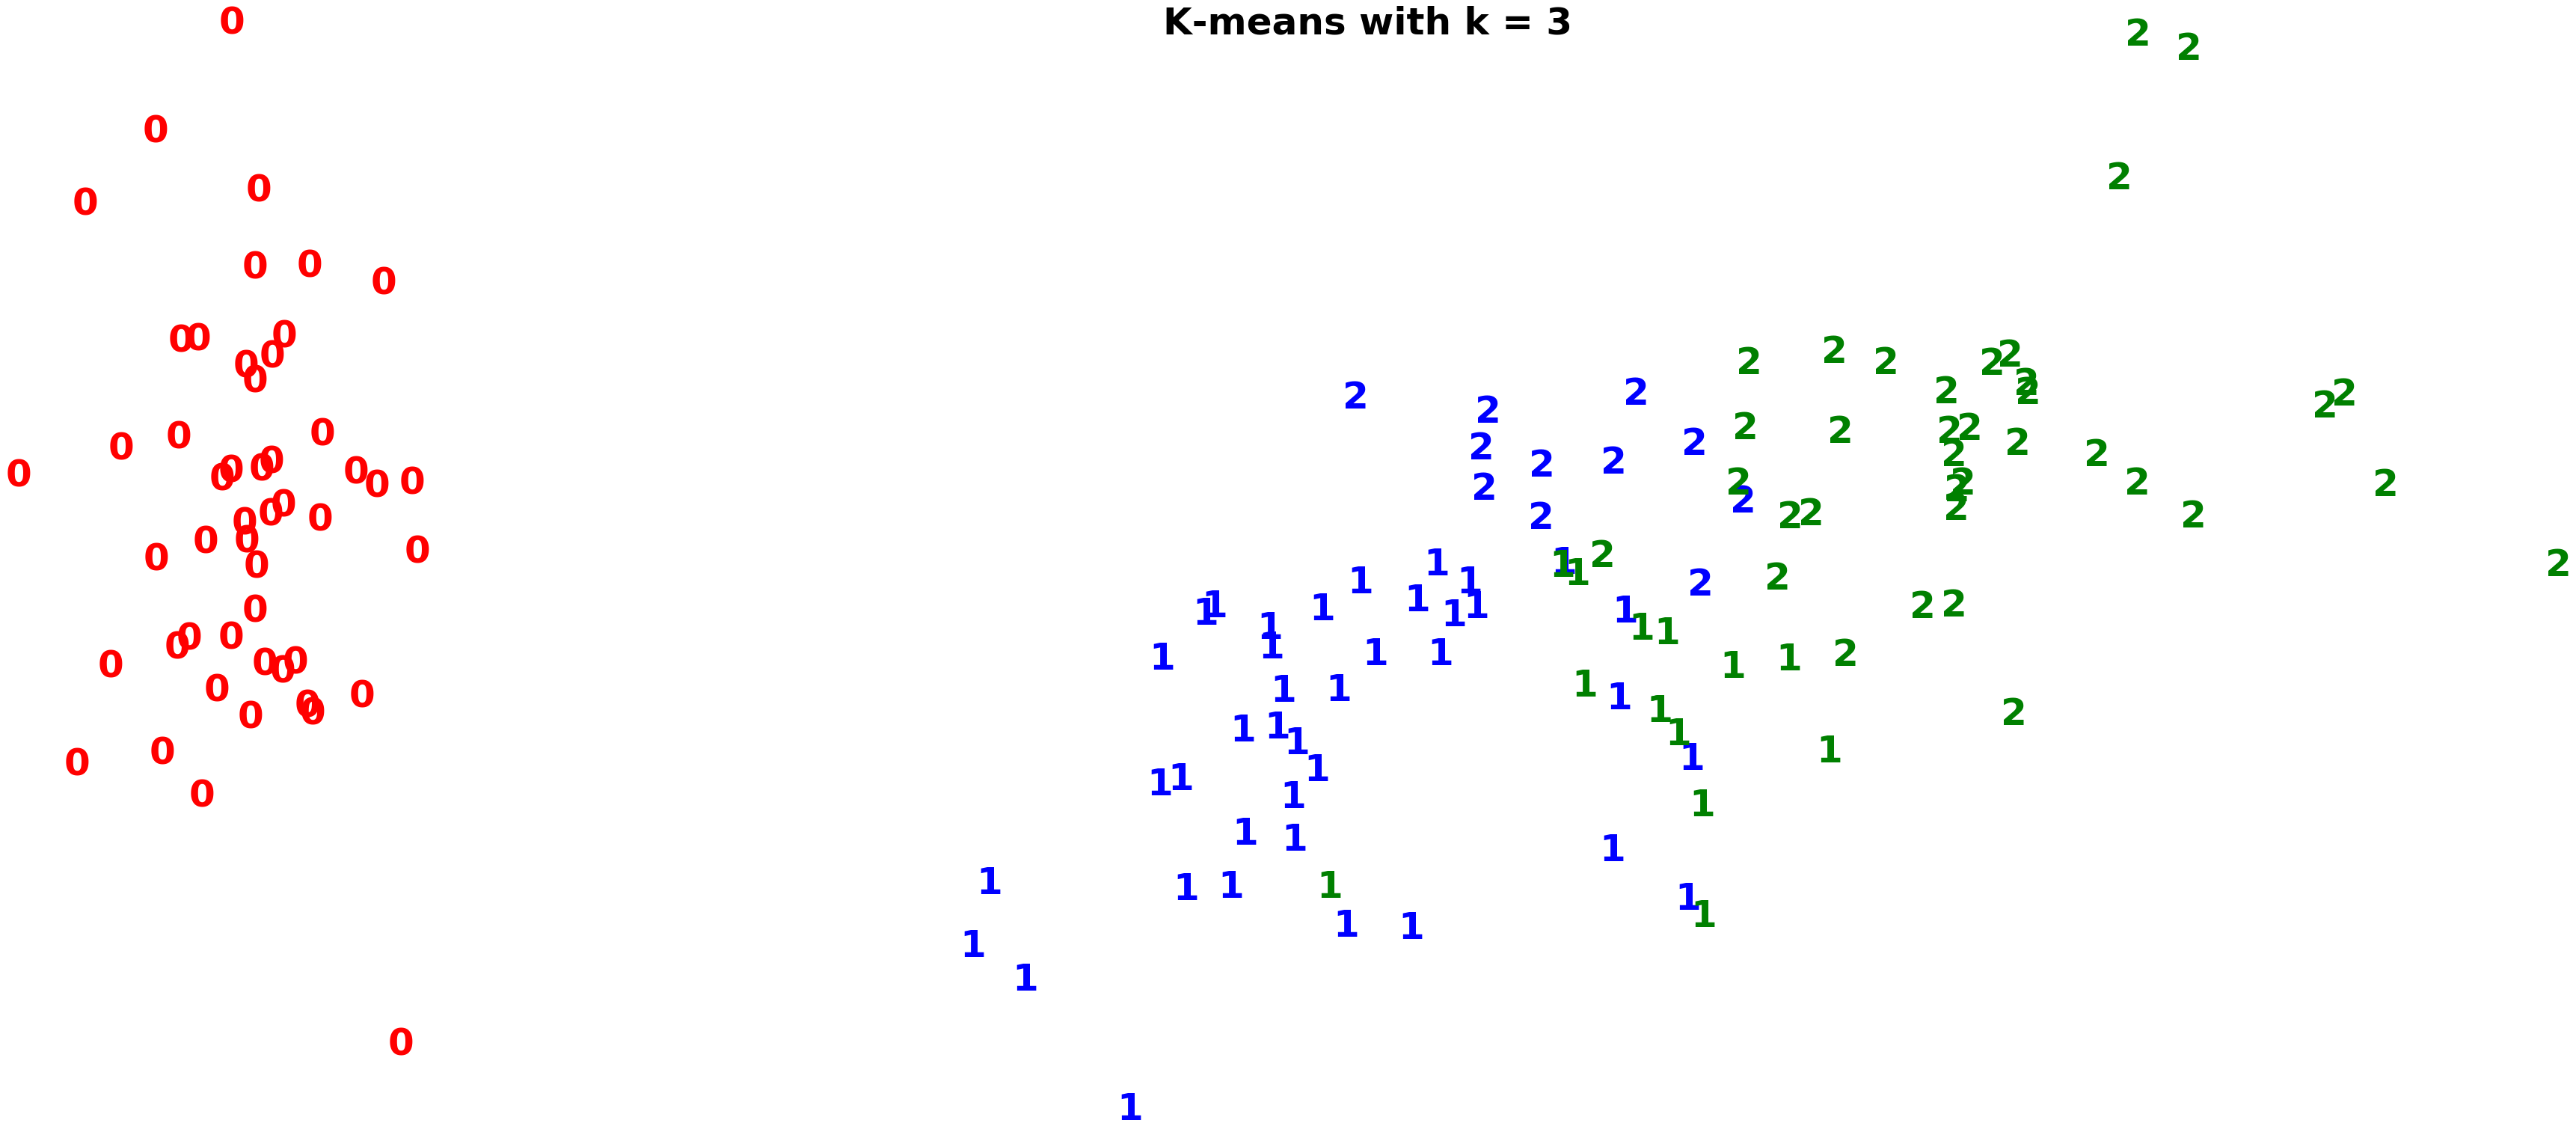

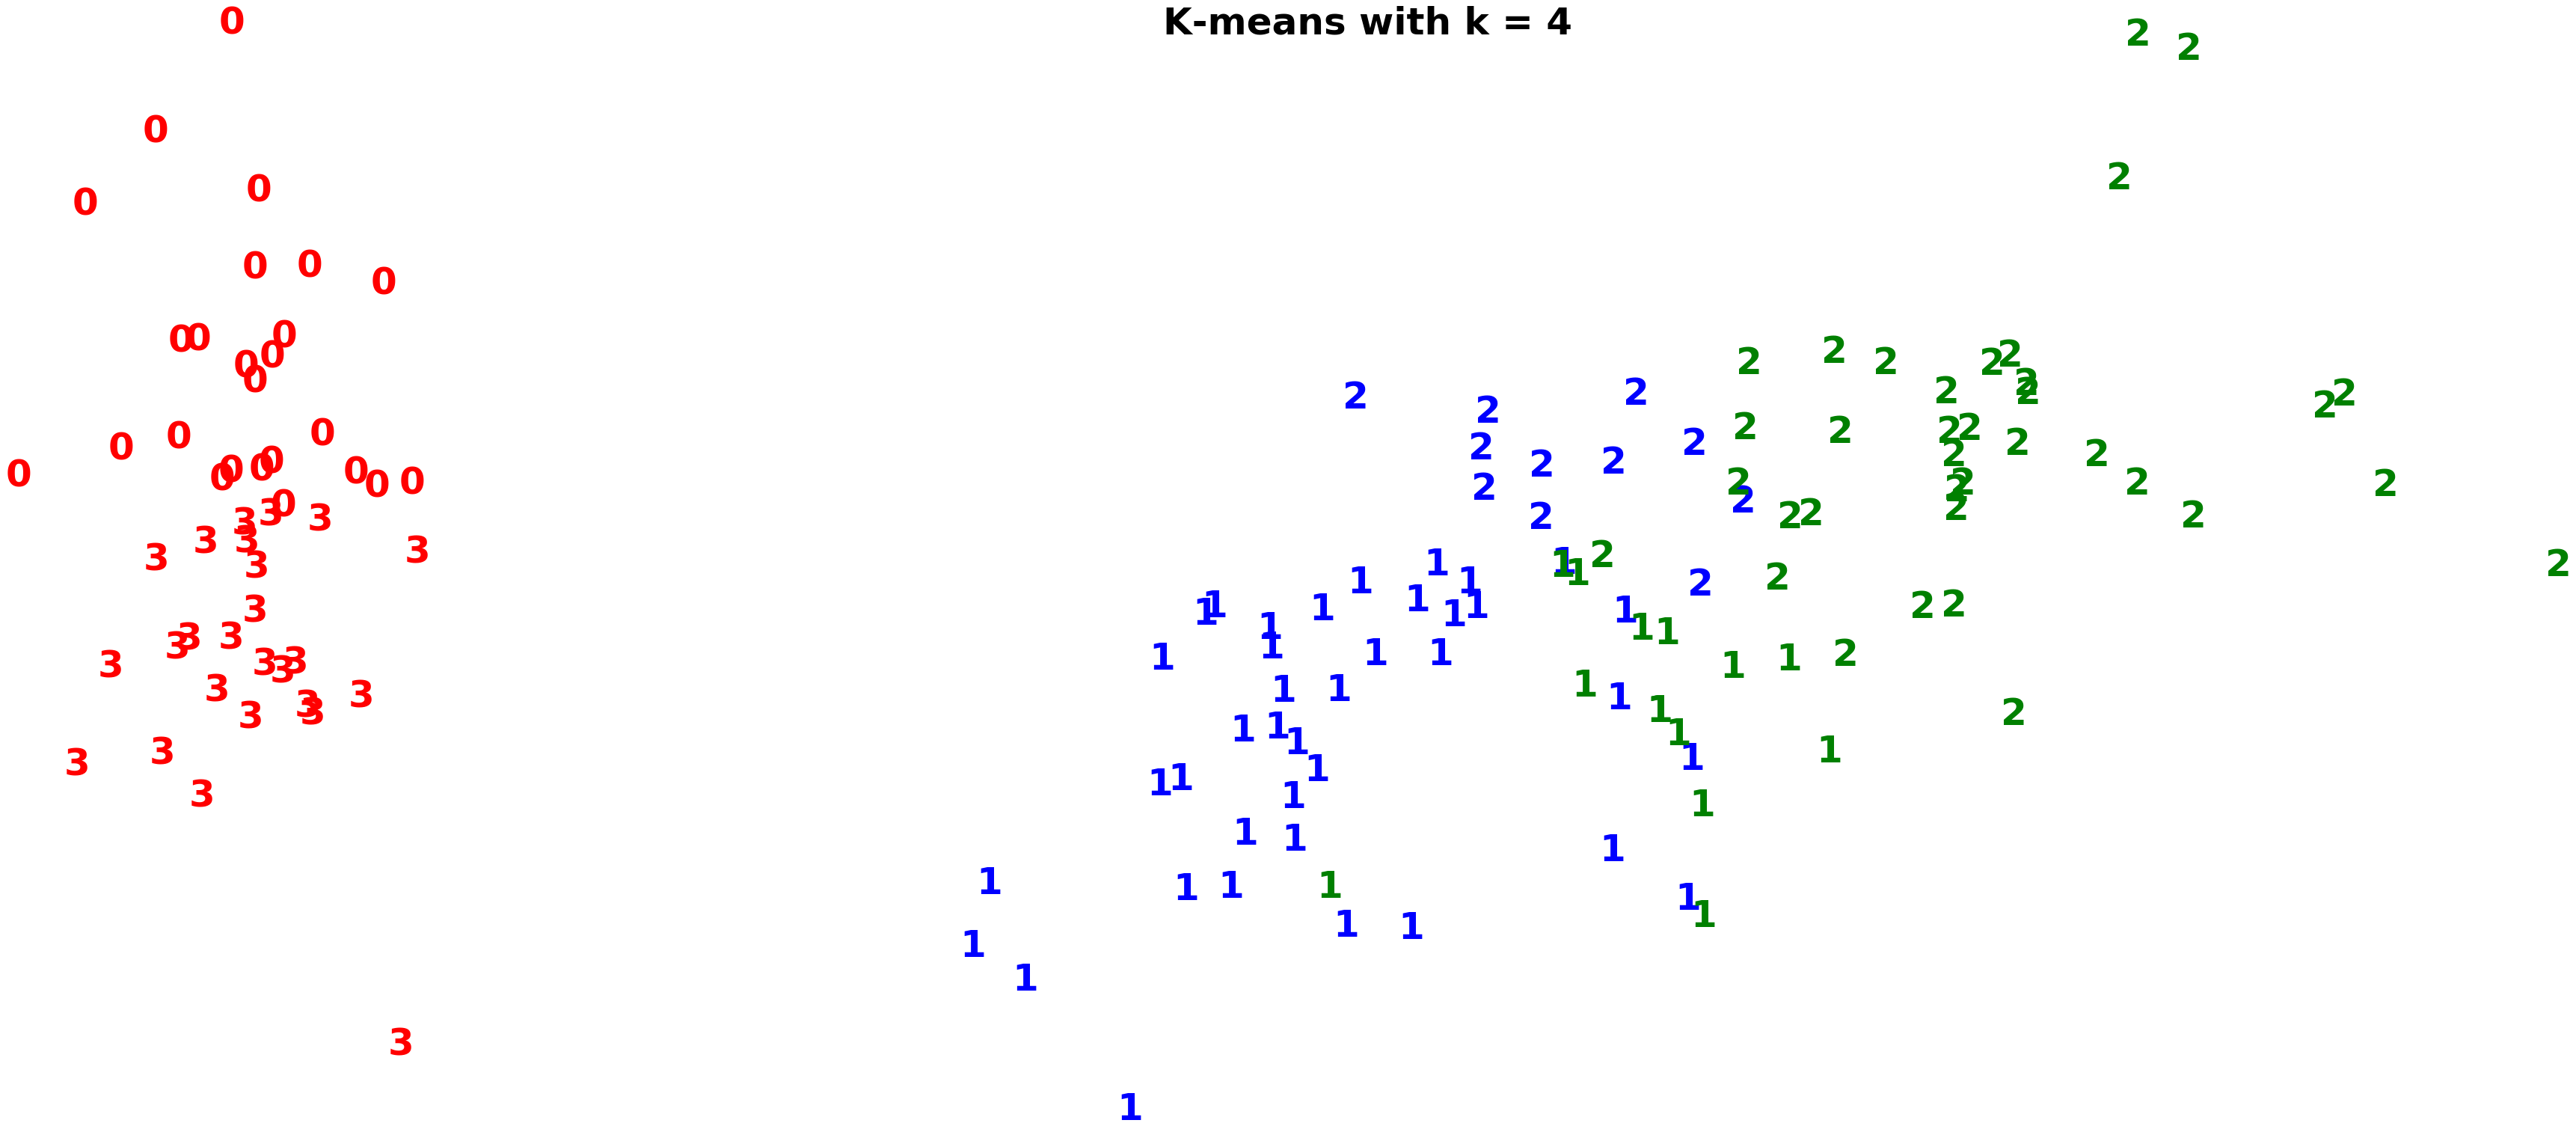

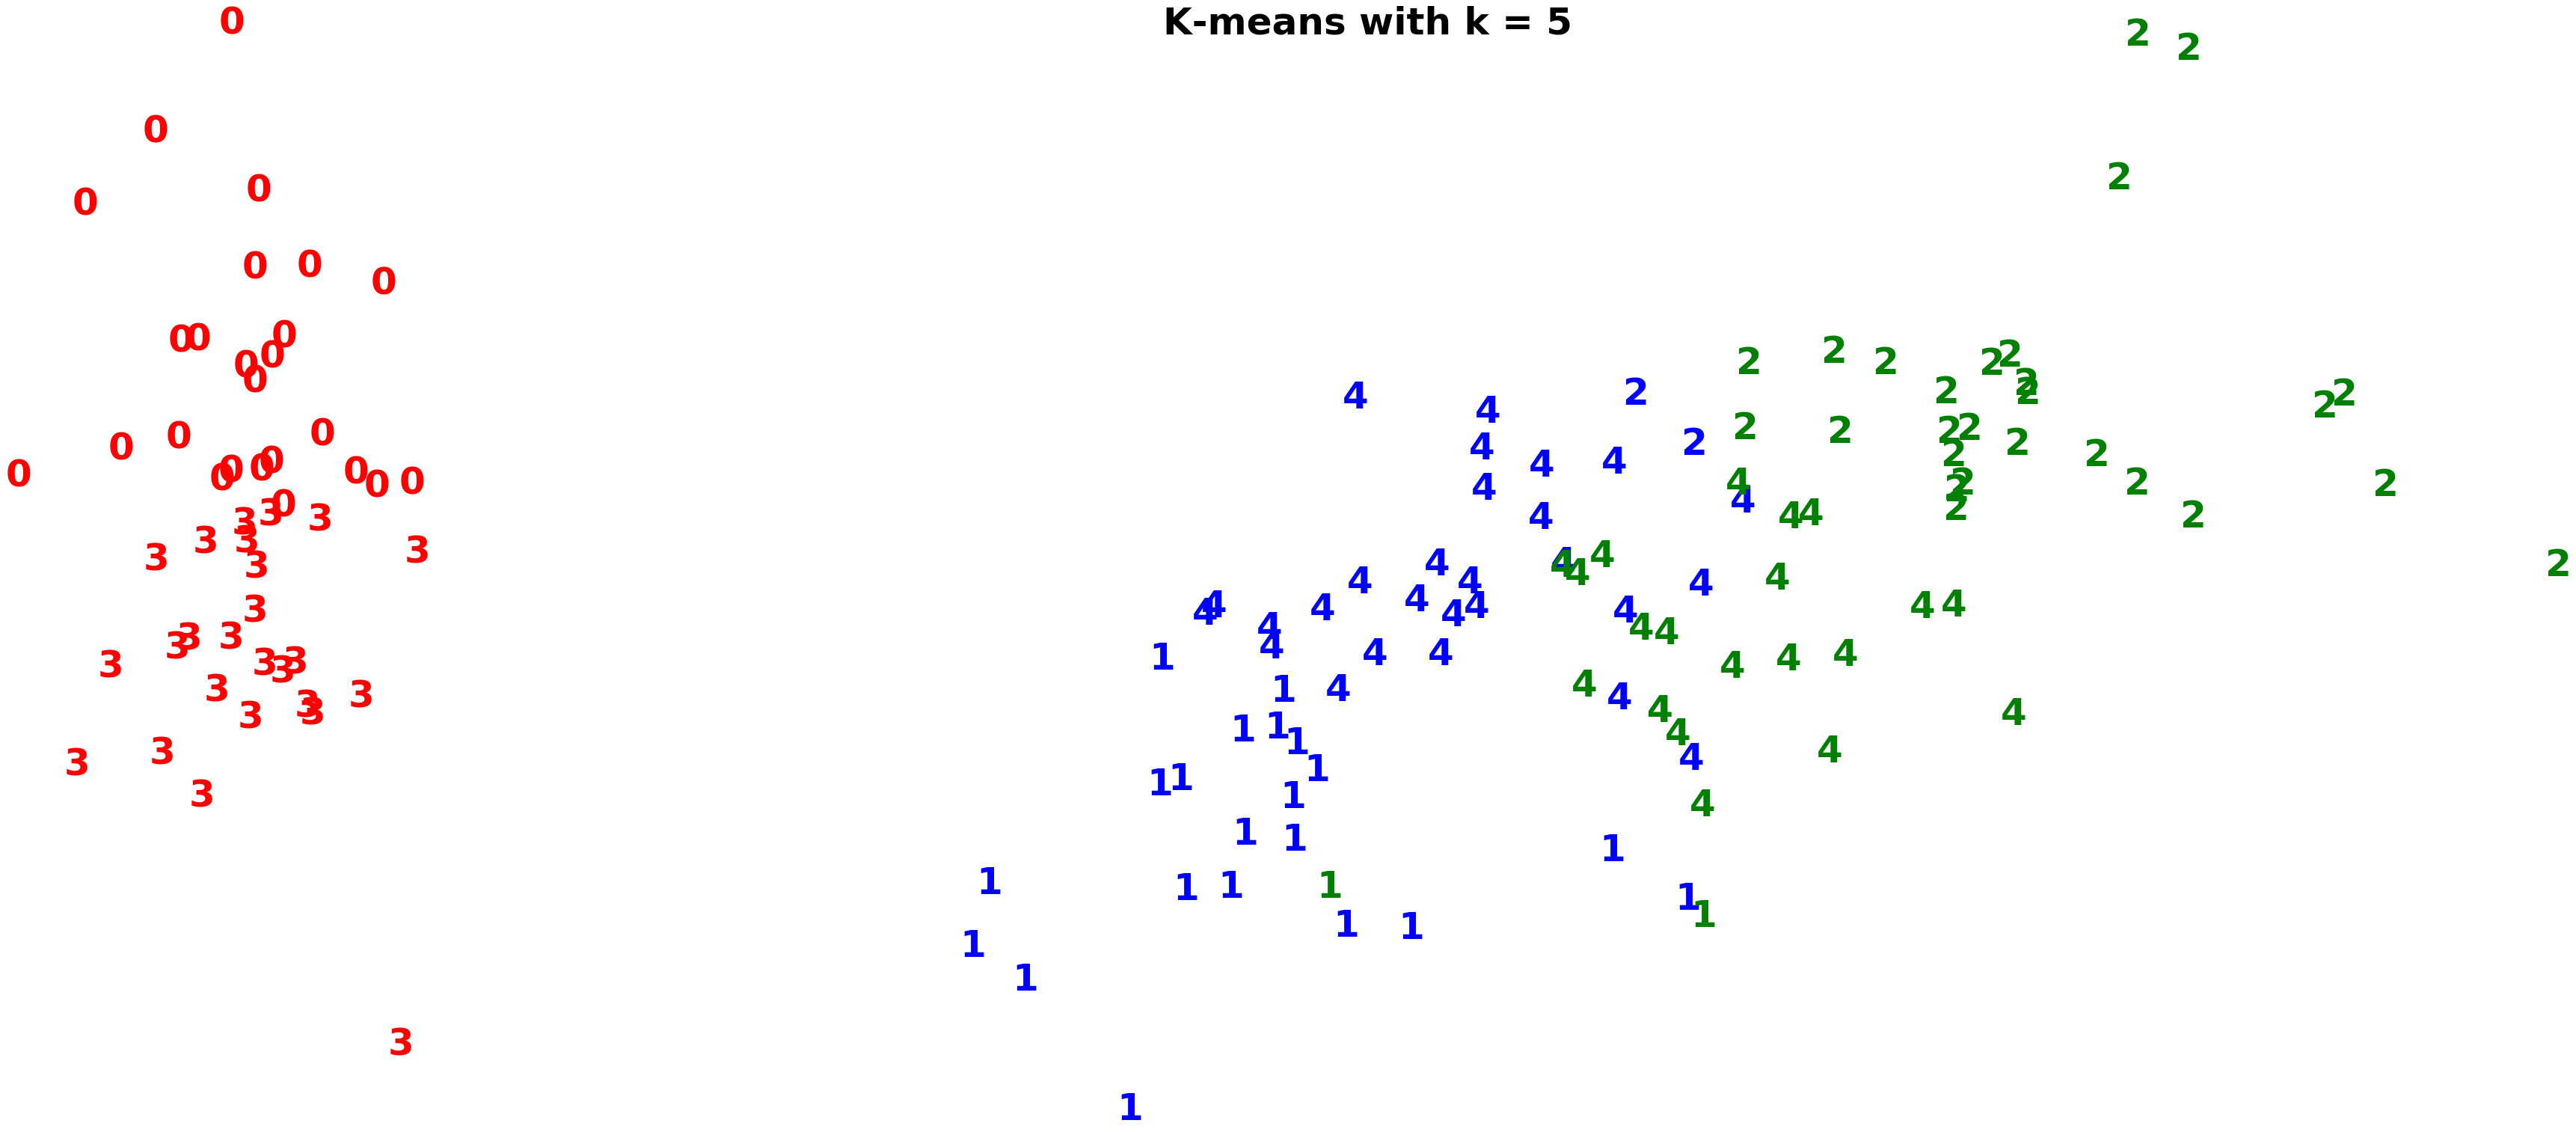

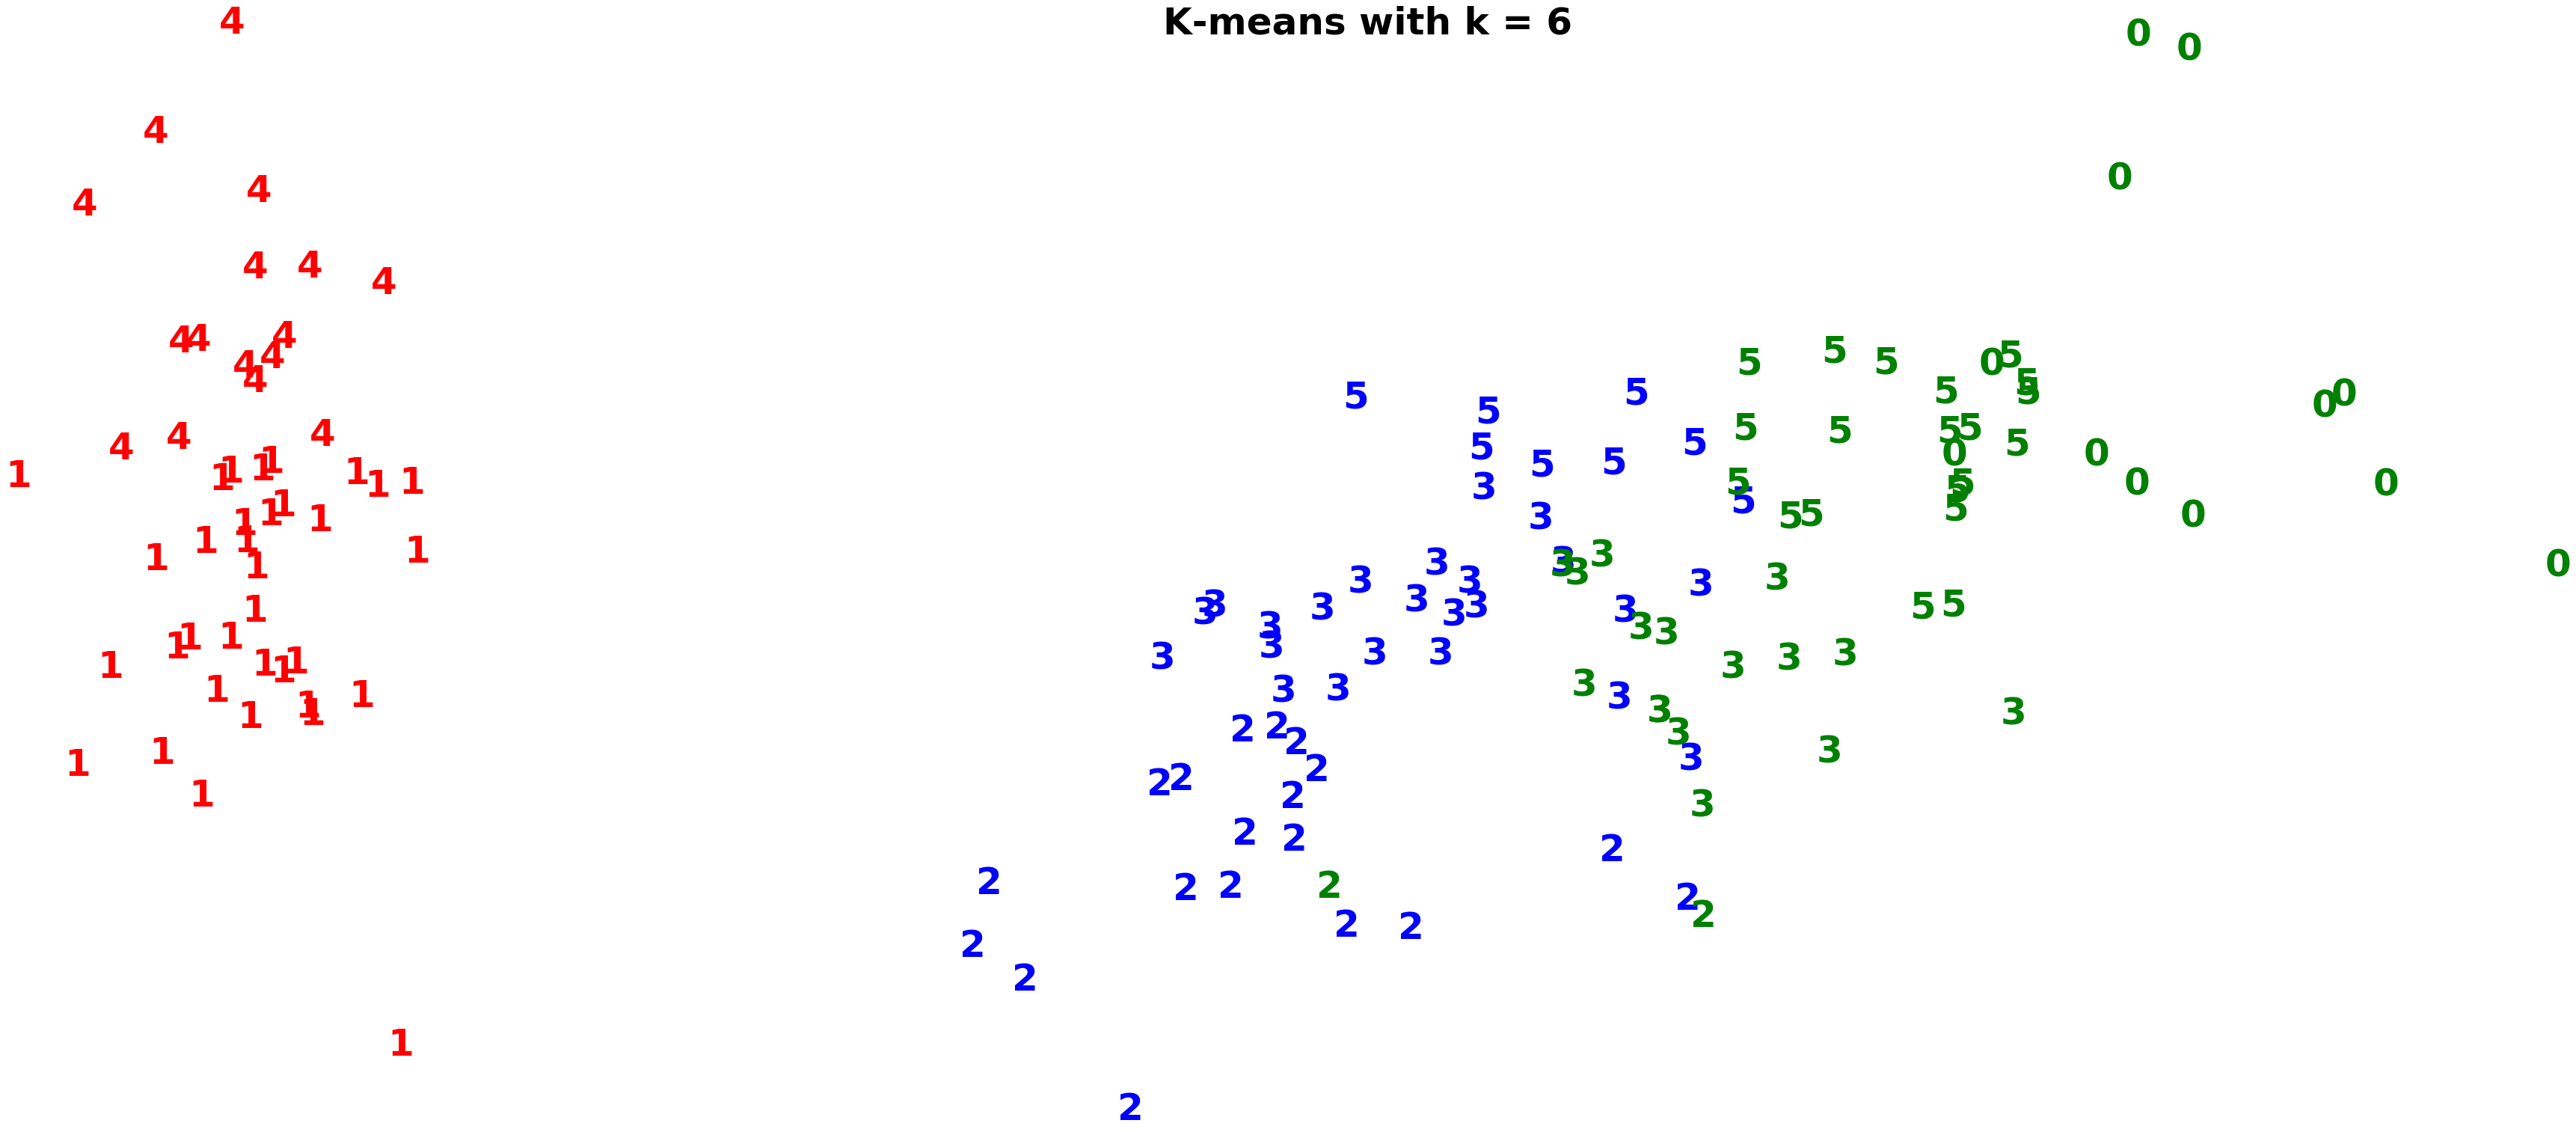

In [5]:
# Dementionality reduction using PCA for visualization of clusters:
pca = PCA(n_components=2).fit_transform(X_std)

colours = 'rbg'
for i, solution in enumerate(kmeans_clusters):
    plt.figure(figsize=(10,5))
    plt.text(np.mean(pca[:,0]), np.max(pca[:, 1]), "K-means with k = {}".format(cluster_numbers[i]),
                 fontdict={'weight': 'bold', 'size': 50})
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(solution[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50})

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

Among the above solutions, only the ones with k=2 and k=3 assign a single cluster to the linearly separable class at the left most part of the figures. The others assign more than one class which doesn't make sense. So, k=2 or k=3 is the only viable ones. However, when k=2, k-means can only assign a single cluster to the linearly non-separable classes where k=3 can assign them to two clusters. Hence, as we might expect, the best solution seems the be the one where k is equal to 3.

We know this is true, since we already had the ground truth information about the dataset above, which states that there are 3 different species of iris included in the experiment.

## K-means clustering on Heart Disease dataset:

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). 

The 14 attributes used in the below dataset include: 
* **0 = (age)**
* **1 = (sex)** 
* **2 = (cp)**
* **3 = (trestbps)**
* **4 = (chol)** 
* **5 = (fbs)** 
* **6 = (restecg)** 
* **7 = (thalach)**
* **8 = (exang)** 
* **9 = (oldpeak)** 
* **10 = (slope)**
* **11 = (ca)** 
* **12 = (thal)** 
* **13 = (the predicted attribute)**

In [15]:
# Establish database connection:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query:
engine.dispose()

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [14]:
# Define the features and the outcome
X = df.iloc[:, :13] # features
y = df.iloc[:, 13] # outcome

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

In [17]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

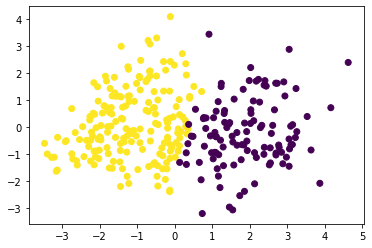

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      101   13
1       38  151


In [18]:
# Reduce it to two components for visualization
X_pca = PCA(2).fit_transform(X_std)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

As we already saw from the introduction of the dataset above, this Heart Disease dataset has 2 clusters: 0(absence of heart disease), and 1(heart disease detected). Looking at our K-means model, we can see that the model accurately predict 252 out of 303 observations, which is equivalent to a 83% accuracy.